In [14]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the character metadata dataset
character_data = pd.read_csv('data/character.metadata.v1.csv')

# Displaying the first few rows of the dataset to understand its structure
character_data.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Character Category,Genres Reduced
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,SC,"['Action', 'Thriller', 'Western', 'Adventure',..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,MC,"['Action', 'Thriller', 'Western', 'Adventure',..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,MC,"['Action', 'Thriller', 'Western', 'Adventure',..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,MC,"['Action', 'Thriller', 'Western', 'Adventure',..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,SC,"['Action', 'Thriller', 'Western', 'Adventure',..."


In [7]:
# Function to safely convert string representations of lists into actual lists
def string_to_list(list_string):
    try:
        # This safely evaluates a string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of error (e.g., empty strings), return an empty list
        return []
    
character_data['Genres Reduced'] = character_data['Genres Reduced'].apply(string_to_list)

In [8]:
# Data Cleaning and Transformation

# Convert 'Movie release date' to datetime and extract the year
character_data['Movie release date'] = pd.to_datetime(character_data['Movie release date'], errors='coerce')
character_data['Release Year'] = character_data['Movie release date'].dt.year

# Ensuring 'Actor gender' is consistently formatted
# Assuming 'M' stands for Male, 'F' for Female, and other values might indicate other genders or missing data
character_data['Actor gender'] = character_data['Actor gender'].str.upper().str.strip()

# Drop rows with missing 'Release Year' or 'Actor gender' as they are crucial for our analysis
character_data_cleaned = character_data.dropna(subset=['Release Year', 'Actor gender'])

# Checking the cleaned data
character_data_cleaned.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Character Category,Genres Reduced,Release Year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,SC,"[Action, Thriller, Western, Adventure, Horror,...",2001.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,MC,"[Action, Thriller, Western, Adventure, Horror,...",2001.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,MC,"[Action, Thriller, Western, Adventure, Horror,...",2001.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,MC,"[Action, Thriller, Western, Adventure, Horror,...",2001.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,SC,"[Action, Thriller, Western, Adventure, Horror,...",2001.0


In [9]:
# Categorization and Segmentation

# Temporal Segmentation
# Here, we'll segment the data by decades. Adjust this if the range of years is not suitable for decade-wise segmentation.
character_data_cleaned['Decade'] = (character_data_cleaned['Release Year'] // 10) * 10

# Gender Categorization
# We'll categorize the data into 'Male', 'Female', and 'Other/Unknown' based on the 'Actor gender' column.
# This categorization might need adjustment based on the unique values present in the 'Actor gender' column.
character_data_cleaned['Gender Category'] = character_data_cleaned['Actor gender'].replace({
    'M': 'Male',
    'F': 'Female'
})
character_data_cleaned['Gender Category'] = character_data_cleaned['Gender Category'].fillna('Other/Unknown')

# Counting the number of characters by Gender and Decade
gender_decade_counts = character_data_cleaned.groupby(['Decade', 'Gender Category']).size().unstack(fill_value=0)

# Character Category Distribution
# Analyzing the distribution of character categories (Main Character, Supporting Character, etc.) within each gender and time segment
character_category_counts = character_data_cleaned.groupby(['Decade', 'Gender Category', 'Character Category']).size().unstack(fill_value=0)

# Displaying the results
gender_decade_counts, character_category_counts.head()


C:\Users\arist\AppData\Local\Temp\ipykernel_45768\732527754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_data_cleaned['Decade'] = (character_data_cleaned['Release Year'] // 10) * 10
C:\Users\arist\AppData\Local\Temp\ipykernel_45768\732527754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_data_cleaned['Gender Category'] = character_data_cleaned['Actor gender'].replace({
C:\Users\arist\AppData\Local\Temp\ipykernel_45768\732527754.py:14: SettingWithCopyWarning: 
A value is tryi

(Gender Category  Female   Male
 Decade                        
 1880.0                2      2
 1890.0               13     17
 1900.0               82    153
 1910.0             2242   3904
 1920.0             2946   5581
 1930.0             5829  13025
 1940.0             5755  13587
 1950.0             7652  17105
 1960.0             7912  17943
 1970.0            10077  22548
 1980.0            13232  28470
 1990.0            20345  40391
 2000.0            42798  78499
 2010.0            12422  22667,
 Character Category      MC  SC
 Decade Gender Category        
 1880.0 Female            0   2
        Male              0   2
 1890.0 Female            0  13
        Male              1  16
 1900.0 Female            4  78)

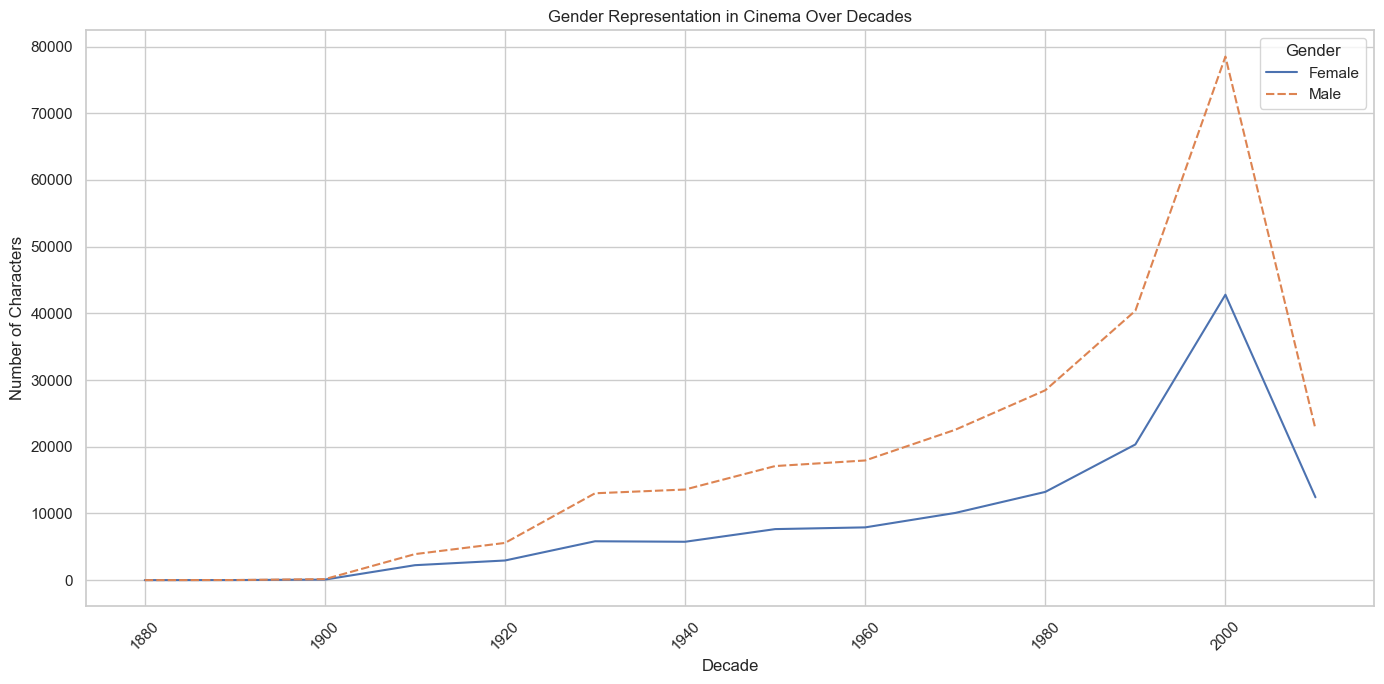

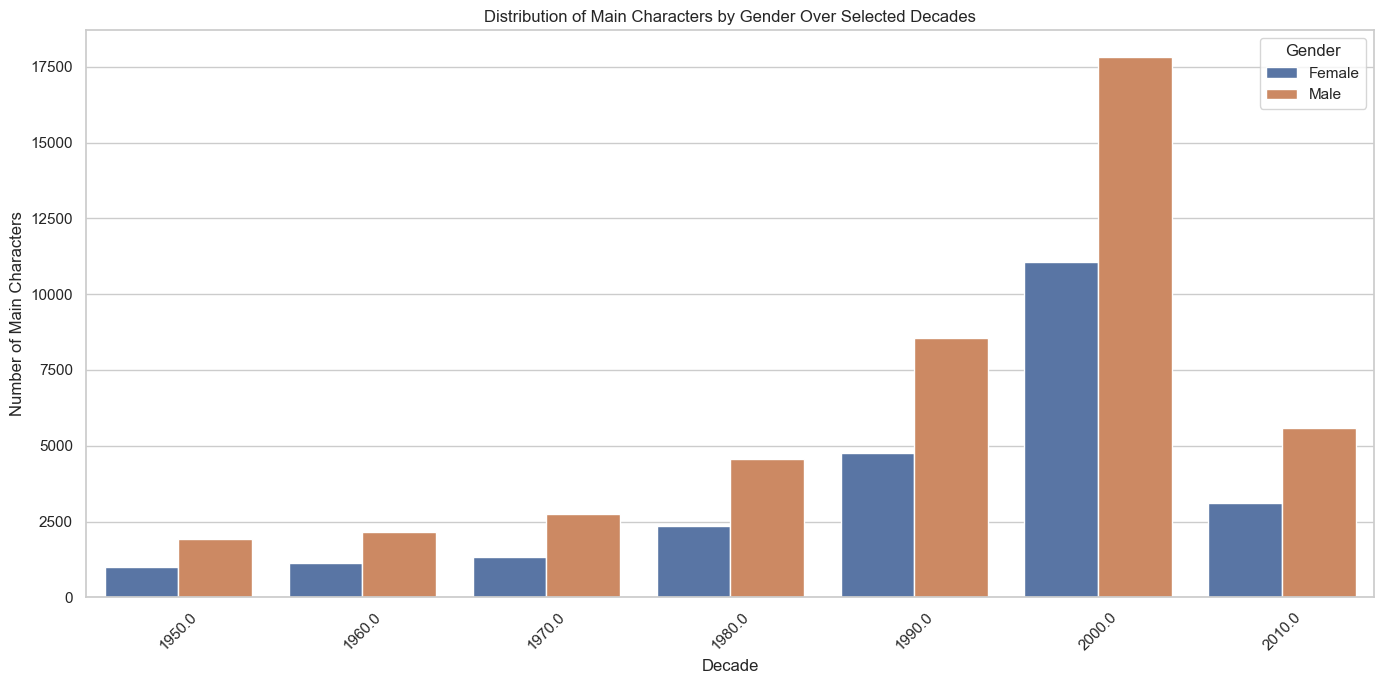

In [12]:
# Correcting Data Indexing for Character Category Distribution
# Resetting the index to simplify data access for plotting
character_category_counts_reset = character_category_counts.reset_index()

# Filtering for selected decades
selected_decades = character_category_counts_reset[character_category_counts_reset['Decade'].between(1950, 2010)]

# Plotting Gender Counts by Decade
plt.figure(figsize=(14, 7))
sns.lineplot(data=gender_decade_counts)
plt.title('Gender Representation in Cinema Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()

# Plotting Character Category Distribution
plt.figure(figsize=(14, 7))
sns.barplot(x='Decade', y='MC', hue='Gender Category', data=selected_decades)
plt.title('Distribution of Main Characters by Gender Over Selected Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Main Characters')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plots
plt.show()


1. **Gender Representation Over Decades**:
   - The line plot shows the number of characters by gender across different decades. There is a clear trend of increasing representation for both male and female characters over time, with a notable increase in the latter half of the 20th century. However, male characters consistently outnumber female characters in each decade.

2. **Distribution of Main Characters by Gender**:
   - The bar plot focusing on the distribution of main characters (MC) by gender over selected decades (1950 to 2010) reveals gender disparities in leading roles. It appears that male main characters have been more prevalent than female main characters in every selected decade.

### Insights and Considerations:
- **Growing Representation**: The overall increase in the number of characters over the decades could be indicative of the expanding film industry and the diversification of stories being told.
- **Gender Gap in Leading Roles**: The persistent gap between male and female main characters suggests a longstanding gender disparity in lead roles in cinema.
- **Cultural and Industry Influences**: These trends are likely influenced by broader cultural attitudes and industry practices regarding gender representation.
- **Further Analysis**: Additional analysis could explore how these trends vary across genres or correlate with other factors like commercial success or critical acclaim.


In [19]:
# Preparing the Data for Genre-Based Analysis

# Unpacking the list of genres and associating it with gender data
genre_gender_data = character_data_cleaned.explode('Genres Reduced')
genre_gender_data = genre_gender_data.rename(columns={'Genres Reduced': 'Genre'})

# Aggregate Data by Genre
genre_gender_counts = genre_gender_data.groupby(['Genre', 'Gender Category']).size().unstack(fill_value=0)

# Calculate Proportions
# To calculate proportions, we divide the gender counts by the total counts per genre
genre_proportions = genre_gender_counts.div(genre_gender_counts.sum(axis=1), axis=0)

# Display the aggregated data and proportions for initial inspection
genre_gender_counts.head(), genre_proportions.head()





(Gender Category  Female   Male
 Genres Reduced                
 Action            18639  56891
 Adult              3264   4390
 Adventure         18839  54306
 Animated           1555   2532
 Animation          5129  11086,
 Gender Category    Female      Male
 Genres Reduced                     
 Action           0.246776  0.753224
 Adult            0.426444  0.573556
 Adventure        0.257557  0.742443
 Animated         0.380475  0.619525
 Animation        0.316312  0.683688)

<Figure size 2800x700 with 0 Axes>

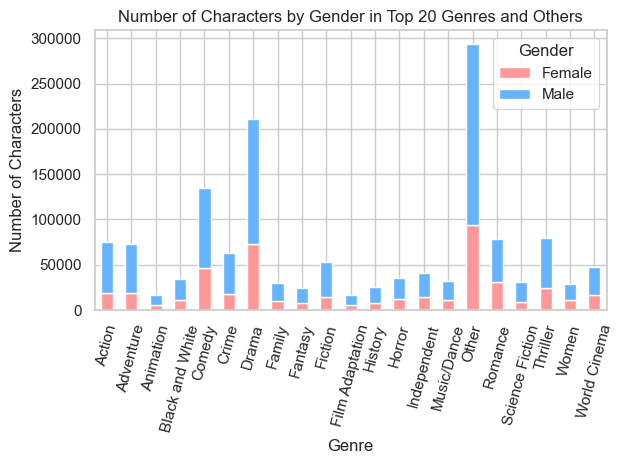

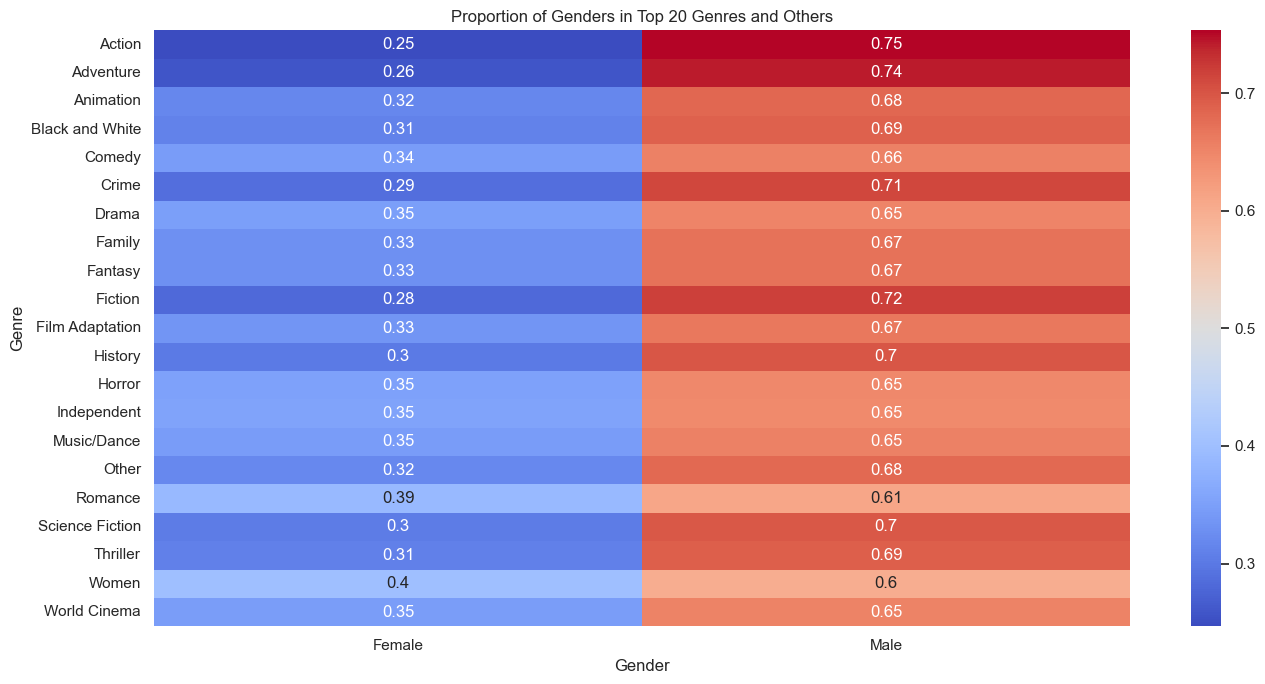

In [27]:
# Since the specific genres aren't listed in the error output, we'll assume a hypothetical large number of genres.
# We will demonstrate how to plot with a reduced set of genres for clarity.

# Selecting the top N genres by the number of characters and grouping the rest into 'Other'
N = 20  # Number of genres to display individually
top_genres = genre_gender_counts.sum(axis=1).nlargest(N).index
reduced_genre_data = genre_gender_data.copy()
reduced_genre_data['Genre'] = reduced_genre_data['Genre'].where(reduced_genre_data['Genre'].isin(top_genres), 'Other')

# Re-aggregate the data with the reduced set of genres
reduced_genre_counts = reduced_genre_data.groupby(['Genre', 'Gender Category']).size().unstack(fill_value=0)
reduced_genre_proportions = reduced_genre_counts.div(reduced_genre_counts.sum(axis=1), axis=0)

# Re-plotting the bar chart with reduced number of genres
plt.figure(figsize=(28, 7))
reduced_genre_counts.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Number of Characters by Gender in Top 20 Genres and Others')
plt.xlabel('Genre')
plt.ylabel('Number of Characters')
plt.xticks(rotation=75)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

# Re-plotting the heatmap with reduced number of genres
plt.figure(figsize=(14, 7))
sns.heatmap(reduced_genre_proportions, cmap='coolwarm', annot=True)
plt.title('Proportion of Genders in Top 20 Genres and Others')
plt.xlabel('Gender')
plt.ylabel('Genre')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Bar Chart Analysis
- **Overall Trend**: The bar chart illustrates a consistent trend across most genres with a greater number of male characters than female characters.
- **Genre Specifics**: Certain genres like 'Romance' and 'Music/Dance' appear to have a higher representation of female characters compared to genres like 'Action' and 'Science Fiction', which are more male-dominated.
- **Outliers**: The 'Other' category shows a notably higher count for female characters, which could include genres less represented in the top 20 that may have more balanced or female-centric stories.

### Heatmap Analysis
- **Proportional Representation**: The heatmap reinforces the bar chart findings by showing the proportion of female to male characters within the top genres. It clearly highlights the gender disparity across genres, with none achieving parity.
- **Highest Female Representation**: Genres like 'Romance' and 'Music/Dance' have the highest proportions of female characters, nearing 40%.
- **Lowest Female Representation**: 'Fiction' and 'Action' genres have some of the lowest proportions of female characters, with less than 30% representation.

### Insights and Interpretations
- **Industry Trends**: These visualizations suggest entrenched industry trends where certain genres are dominated by male characters. It aligns with broader observations of gender stereotyping in film, where genres are often geared towards specific gender audiences based on traditional roles and expectations.
- **Cultural Reflection**: The data reflects cultural narratives and the slow shift towards gender balance in cinema. While there is progress in some genres, others remain significantly gendered.
- **Analysis Depth**: While the visualizations are informative, they do not explain why these disparities exist. Further qualitative analysis could provide deeper insights into the causes of gender imbalance within genres.